In [1]:
%matplotlib inline

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import skimage
from scipy import ndimage
from skimage.morphology import label
from keras.callbacks import EarlyStopping, ModelCheckpoint

/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# Input data files are available in the "../input/" directory.
#Simple CNN keras
from keras.layers import Lambda
from keras.models import Model , load_model
from keras.models import Sequential
from keras.layers import concatenate
from keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D 
from keras.losses import binary_crossentropy
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Conv2DTranspose
from keras import backend as K

In [4]:
import tensorflow as tf
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt
from subprocess import check_output
import os

In [5]:
from skimage.transform import rescale, resize, downscale_local_mean
# Any results you write to the current directory are saved as output.

In [6]:
train_dir = "/input/stage1_train"

In [7]:
train_images = [i for i in os.listdir(train_dir)]

In [8]:
len(train_images)

670

In [9]:
bad_images = ['7b38c9173ebe69b4c6ba7e703c0c27f39305d9b2910f46405993d2ea7a963b80','b1eb0123fe2d8c825694b193efb7b923d95effac9558ee4eaf3116374c2c94fe','9bb6e39d5f4415bc7554842ee5d1280403a602f2ba56122b87f453a62d37c06e','58c593bcb98386e7fd42a1d34e291db93477624b164e83ab2afa3caa90d1d921']

In [10]:
messy_masks = ['a09ae9559f817b104e049e5bb01cf4ad1b87e3ef7fad3dcf932b6585ca3edc05']

In [11]:
final_images = []

for dirs in train_images:
    final_images.append(plt.imread(train_dir + '/' + dirs + '/' + 'images/' + dirs+ '.png'))

    

In [12]:
label_masks = []
for j,dirs in enumerate(train_images):
    print(dirs)
    maximum = np.zeros(final_images[j].shape[0:2])
    for i,img in enumerate(os.listdir(train_dir +'/' +dirs + "/" + "masks/")):
        if img == ".DS_Store":
             continue
        else:
            image = plt.imread(train_dir + '/' + dirs + "/" + "masks/" + img)
            print(image.shape)
            maximum = np.maximum(maximum,image)
    label_masks.append(maximum)

6bd18a218d25247dc456aed124c066a6397fb93086e860e4d04014bfa9c9555d
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
6fc83b33896f58a4a067d8fdcf51f15d4ae9be05d8c3815d23336f1f2a8c45a1
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
e4537e7893e631f3ba6ae5b1023e24b233c78249a31c2f5e561f6c4cad88fcf6
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(2

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
70827e40a7155391984e56703c6df3392fb4a94bbd6c7008da6a6ca3244965d9
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
98c5ead89cd066637efd5c93a6edc55c85908eb66807471f0d246d5457341f9c
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
ad9d305cbf193d4250743ead466bdaefe910835d7e352c544e22320e8336f5c1
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(5

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)

(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
ef3ef194e5657fda708ecbd3eb6530286ed2ba23c88efb9f1715298975c73548
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
a891bbc8914

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
81e2dd950e6df28a4fe202a40afa98b202981f65a5ca05b389749290eb87c883
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
40946065f7e4b6038599fbfd419f2a67e7635b6f89db3ed6c0d67c8801521af1
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(2

(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
d7d12a2acc47a94961aeb56fd56e8a0873016af75f5dd10915de9db8af8e4f5e
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
c15c652c08153fb781a5349123ab8f80bb2a8680a41eb8e89e547ae01b7a5441
(520, 696)
(520, 696)
(520, 696)
(520, 696)
a486f6ed4b8781e7883e433d06a83dd66db3e8b36d45b9976c4214820ee22629
(520, 696)
(520, 696)
(520, 696)
(5

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
785555c0cbb49dad835635217085287a8cc61c27d26f0e106b70c1dfd05784dc
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
cbca32daaae36a872a11da4eaff65d1068ff3f154eedc9d3fc0c214a4e5d32bd
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(2

(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603

(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
86f9087eb1d0875ffb1a28cca7645b14d6c66f995c7d96aa13969d2f8115d533
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
f35ab34528e3e2d2589d24cbffc0e10024dfc474a68585d0b5feb7b05aa0067f
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
2f929b067a59f88530b6bfa6f6889bc3a38adf88d594895973d1c8b2549fd93d
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(2

(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
b1e3aeb0c56261c17eb71c747d116057b8da7e8c8a6845bdc01b2b3ee2299229
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
45cc00f2ef95da6698bf590663e319d7c0ed4fb99d42dd3cf4060887da74fb81
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
538b7673d507014d83af238876e03617396b70fe27f525f8205a4a96900fbb8e
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)


(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
7aae06bc4558829473071defec0b7ab3bfa9c5005548a13da95596bb6a66d105
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
74a7785530687a11ecd073e772f90912d9967d02407a192bfab282c35f55ab94
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
cbff60361ded0570e5d50429a1aa51d81471819bc9b38359f03cfef76de0038c
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
f0c9f135c62572f3669a75b2c735e4477dc77fac85e653426ee2b3bcfbed7aaf
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
2d53d7ec0c579fffd6710c956288537d46c719a93c6a04ac0d6550f75a6a6493
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
92f31f591929a30e4309ab75185c96ff4314ce0a7ead2ed2c2171897ad1da0c7
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
da8ca06ccbb4e2a8718f7c2939ef6cc3a4088981f66084

(256, 256)
(256, 256)
(256, 256)
(256, 256)
9a71a416f98971aa14f63ef91242654cc9191a1414ce8bbd38066fe94559aa4f
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
62570c4ff1c5ab6d9d383aba9f25e604768520b4266afd40fdf4734a694c8bc3
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
610f32e2d9d270d740aec501dcf0c89595e4e623468ad43272adab90520a8f96
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(2

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
13f2bec0a24c70345372febb14c4352877b1b6c1b01896246048e83c345c0914
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df
(1024, 1024)

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)

(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
e4ae1ceddb279bac30273ca7ac480025ce2e7287328f5272234b5bbca6d13135
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
f113626a04125d97b27f21b45a0ce9a686d73dee7b5dbc0725d49194ba0203bd
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
df33b11184427e05c8a450f921586685975fe975f57315e686a0f26fddb93db1
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(2

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
fc22db33a2495f58f118bc182c0087e140df14ccb8dad51373e1a54381f683de
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)


(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
7d40ea6ead1bec903f26d9046d291aedcb12a584b4d3b337ea252b34c7d86072
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
6bc8cda54f5b66a2a27d962ac219f8075bf7cc43b87ba0c9e776404370429e80
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
7ba20aa731cc21af74a8d940254176cbad1bdc44f240b

4ca5081854df7bbcaa4934fcf34318f82733a0f8c05b942c2265eea75419d62f
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
3a508d2dc03db46e7f97a2a30eabb62ab2886f3cedfea303de8f6a42e50d20eb
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
04acab7636c4cf61d288a5962f15fa456b7

(256, 256)
(256, 256)
6b72b61b80060a9e79a4747f9c5d5af135af9db466681c2d1086f784c7130699
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)


(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
6b6d4e6ff52de473a4b6f8bd0f11ae22242d508cc4117ff38ec39cbb88088aaa
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
353ab00e964f71aa720385223a9078b770b7e3efaf5be0f66e670981f68fe606
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
2cfa61bef6542dd359717e9131ce6f076c415a3bd7f48cb093b0d7f3b2ca785d
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)


(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
8bef203fce625e4d8c89dca728158be4662dfdfdcd4dc73a6aa39a908c1631bc
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
4185b9369fc8bdcc7e7c68f2129b9a7442237cd0f836a4b6d13ef64bf0ef572a
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
e5a6c5e01e6a4ef676a2d975374e995dd55792ea317a8e110bebc37da83a4ce8
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
f9ea1a1159c33f39bbe5f18bb278d961188b40508277eab7c0b4b91219b37b5d
(

(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
3bf7873f11823f4b64422f49c8248dd95c0d01f9ae9075ae3d233bbb21a3d875
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(25

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)

(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
8d9b4205ddb10fa49a2973b4f3a2dc6923407ae015081e1a52c4b4c2fe8faa53
(256, 256

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
c44ed955eb2e5c8d820b01477e122b32eff6dd475343e11229c33d8af3473b22
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)


(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
7b38c9173ebe69b4c6ba7e703c0c27f39305d9b2910f46405993d2ea7a963b80
(260, 347)


(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
37ed50eea5a1e0bade3e6753793b6caeb061cd4c2f365658c257f69cab1f6288
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
6aa7dd0c88bec4f96cdd497f9c37779733033d9ec6513307461302d36bd32ac7
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(2

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
700afb1cd830a808e3c6125749612e5d23fd9f9726049a9e0c2061997514e1a7
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)


(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)

In [13]:
#Sanity check
for i in range(len(label_masks)):
    if label_masks[i].shape != final_images[i].shape[0:2]:
        print(i)
        print(label_masks[i].shape)
        print(final_images[i].shape)
        print("np")
    else:
        continue

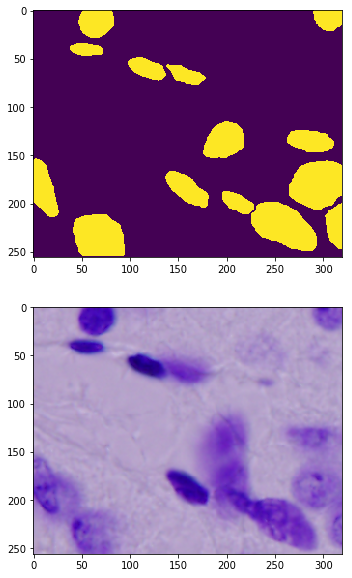

In [14]:
plt.figure(1,figsize= (10,10))
plt.subplot(2,1,1)
plt.imshow(label_masks[20])
plt.subplot(2,1,2)
plt.imshow(final_images[20])

In [15]:
label_masks = np.array(label_masks)

In [16]:
final_images = np.array(final_images)

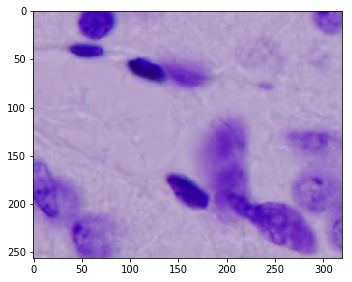

In [17]:
plt.figure(1.,figsize = (10,10))
#plt.subplot(2,1,1)
#plt.imshow(label_masks[20])
plt.subplot(2,1,1) 
plt.imshow(final_images[20])

In [18]:
label_masks[20].shape

(256, 320)

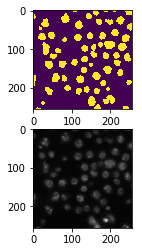

In [19]:
plt.figure(1)
plt.subplot(2,1,1)
plt.imshow(label_masks[10])
plt.subplot(2,1,2) 
plt.imshow(final_images[10])

In [20]:
#Removing bad images
final_images = list(final_images)
label_masks = list(label_masks)
bad_images = ['7b38c9173ebe69b4c6ba7e703c0c27f39305d9b2910f46405993d2ea7a963b80','b1eb0123fe2d8c825694b193efb7b923d95effac9558ee4eaf3116374c2c94fe','9bb6e39d5f4415bc7554842ee5d1280403a602f2ba56122b87f453a62d37c06e','58c593bcb98386e7fd42a1d34e291db93477624b164e83ab2afa3caa90d1d921']
for i,dirs in enumerate(train_images):
    if dirs in bad_images:
        final_images.pop(i)
        label_masks.pop(i)

In [21]:
len(final_images) == len(label_masks)

True

In [22]:
final_images = np.array(final_images)
label_masks = np.array(label_masks)

In [23]:
#Data Augumentation
aug_images = []
aug_masks = []
for i in range(len(final_images)):
    if i%4 == 0:
        temp_shape = final_images[i].shape
        temp_image = final_images[i][0:temp_shape[0]//2,0:temp_shape[1]//2,:]
        temp_mask = label_masks[i][0:temp_shape[0]//2,0:temp_shape[1]//2]
        aug_images.append(temp_image)
        aug_masks.append(temp_mask)
    elif i%4 == 1:
        temp_shape = final_images[i].shape
        temp_image = final_images[i][0:temp_shape[0]//2,temp_shape[1]//2:,:]
        temp_mask = label_masks[i][0:temp_shape[0]//2,temp_shape[1]//2:]
        aug_images.append(temp_image)
        aug_masks.append(temp_mask)
    elif i%4 == 2:
        temp_shape = final_images[i].shape
        temp_image = final_images[i][temp_shape[0]//2:,temp_shape[1]//2:,:]
        temp_mask = label_masks[i][temp_shape[0]//2:,temp_shape[1]//2:]
        aug_images.append(temp_image)
        aug_masks.append(temp_mask)
    elif i%4 == 3:
        temp_shape = final_images[i].shape
        temp_image = final_images[i][temp_shape[0]//2:,0:temp_shape[1]//2,:]
        temp_mask = label_masks[i][temp_shape[0]//2:,0:temp_shape[1]//2]
        aug_images.append(temp_image)
        aug_masks.append(temp_mask)

In [24]:
print(aug_images[1].shape)
print(final_images[1].shape)

(180, 180, 4)
(360, 360, 4)


In [25]:
final_images_final = np.concatenate([final_images,aug_images])

In [26]:
label_masks_final = np.concatenate([label_masks,aug_masks])

In [27]:
len(label_masks_final)

1332

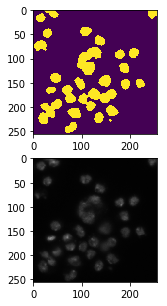

In [28]:
plt.figure(1 ,figsize = (5,5))
plt.subplot(2,1,1)
plt.imshow(np.squeeze(label_masks[61]))
plt.subplot(2,1,2) 
plt.imshow(final_images[61])

In [29]:
for  i in range(len(label_masks_final)):
    print("i",end = "")
    try:
        final_images_final[i] = resize(final_images_final[i] , (512,512,3) , preserve_range=True)
        label_masks_final[i] = resize(label_masks_final[i] , (512,512,1) , preserve_range=True)
    except:
        print(final_images_final[i].shape)

ii

/usr/local/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii

In [30]:
final_images_final = np.stack(final_images_final)
label_masks_final = np.stack(label_masks_final)

In [31]:
print(final_images_final.shape)
print(label_masks_final.shape)

(1332, 512, 512, 3)
(1332, 512, 512, 1)


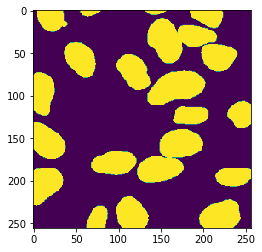

In [33]:
plt.imshow(np.squeeze(label_masks_final[1]))

In [32]:
#Ones and Zeros
for i in range(len(label_masks_final)):
    label_masks_final[i][label_masks_final[i] > 0.5] = 1
    label_masks_final[i][label_masks_final[i] <= 0.5] = 0
    

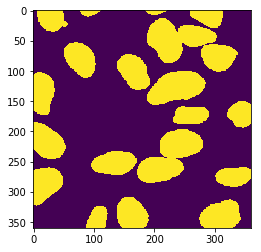

In [35]:
plt.imshow(np.squeeze(label_masks[1]))

In [7]:
def iou_metric(y_true_in, y_pred_in, print_table=False):
    labels = label(y_true_in > 0.5)
    y_pred = label(y_pred_in > 0.5)
    
    true_objects = len(np.unique(labels))
    pred_objects = len(np.unique(y_pred))

    intersection = np.histogram2d(labels.flatten(), y_pred.flatten(), bins=(true_objects, pred_objects))[0]

    # Compute areas (needed for finding the union between all objects)
    area_true = np.histogram(labels, bins = true_objects)[0]
    area_pred = np.histogram(y_pred, bins = pred_objects)[0]
    area_true = np.expand_dims(area_true, -1)
    area_pred = np.expand_dims(area_pred, 0)

    # Compute union
    union = area_true + area_pred - intersection

    # Exclude background from the analysis
    intersection = intersection[1:,1:]
    union = union[1:,1:]
    union[union == 0] = 1e-9

    # Compute the intersection over union
    iou = intersection / union

    # Precision helper function
    def precision_at(threshold, iou):
        matches = iou > threshold
        true_positives = np.sum(matches, axis=1) == 1   # Correct objects
        false_positives = np.sum(matches, axis=0) == 0  # Missed objects
        false_negatives = np.sum(matches, axis=1) == 0  # Extra objects
        tp, fp, fn = np.sum(true_positives), np.sum(false_positives), np.sum(false_negatives)
        return tp, fp, fn

    # Loop over IoU thresholds
    prec = []
    if print_table:
        print("Thresh\tTP\tFP\tFN\tPrec.")
    for t in np.arange(0.5, 1.0, 0.05):
        tp, fp, fn = precision_at(t, iou)
        if (tp + fp + fn) > 0:
            p = tp / (tp + fp + fn)
        else:
            p = 0
        if print_table:
            print("{:1.3f}\t{}\t{}\t{}\t{:1.3f}".format(t, tp, fp, fn, p))
        prec.append(p)
    
    if print_table:
        print("AP\t-\t-\t-\t{:1.3f}".format(np.mean(prec)))
    return np.mean(prec)

def iou_metric_batch(y_true_in, y_pred_in):
    batch_size = y_true_in.shape[0]
    metric = []
    for batch in range(batch_size):
        value = iou_metric(y_true_in[batch], y_pred_in[batch])
        metric.append(value)
    return np.array(np.mean(metric), dtype=np.float32)

def my_iou_metric(label, pred):
    metric_value = tf.py_func(iou_metric_batch, [label, pred], tf.float32)
    return metric_value

In [8]:
# Build U-Net model
inputs = Input((512, 512, 3))
s = inputs

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[my_iou_metric])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 512, 512, 16) 448         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 512, 512, 16) 2320        conv2d_20[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 256, 256, 16) 0           conv2d_21[0][0]                  
__________________________________________________________________________________________________
conv2d_22 

In [35]:
earlystopper = EarlyStopping(monitor = 'val_loss',patience=3, verbose=1)

In [36]:
label_masks_final.shape

(1332, 512, 512, 1)

In [38]:
checkpointer = ModelCheckpoint("weights.{epoch:02d}-{val_loss:.2f}.hdf5", monitor = 'val_loss',verbose=1, save_best_only=True)

In [39]:
results = model.fit(final_images_final, label_masks_final, validation_split=0.1, batch_size=10, epochs=10 ,callbacks=[earlystopper],verbose = 1)

Train on 1198 samples, validate on 134 samples
Epoch 1/10
1198/1198 [==============================] - 191s - loss: 0.2859 - my_iou_metric: 0.0479 - val_loss: 0.3349 - val_my_iou_metric: 0.0375
Epoch 2/10
1198/1198 [==============================] - 183s - loss: 0.2034 - my_iou_metric: 0.1012 - val_loss: 0.1849 - val_my_iou_metric: 0.1351
Epoch 3/10
1198/1198 [==============================] - 182s - loss: 0.1835 - my_iou_metric: 0.1093 - val_loss: 0.2036 - val_my_iou_metric: 0.1336
Epoch 4/10
1198/1198 [==============================] - 182s - loss: 0.1593 - my_iou_metric: 0.0595 - val_loss: 0.1536 - val_my_iou_metric: 0.1524
Epoch 5/10
1198/1198 [==============================] - 182s - loss: 0.1422 - my_iou_metric: 0.0866 - val_loss: 0.1953 - val_my_iou_metric: 0.1508
Epoch 6/10
1198/1198 [==============================] - 182s - loss: 0.1343 - my_iou_metric: 0.1058 - val_loss: 0.1656 - val_my_iou_metric: 0.1700
Epoch 7/10
1198/1198 [==============================] - 181s - loss: 0.

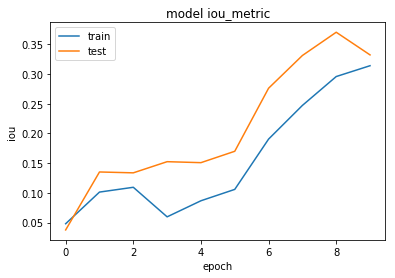

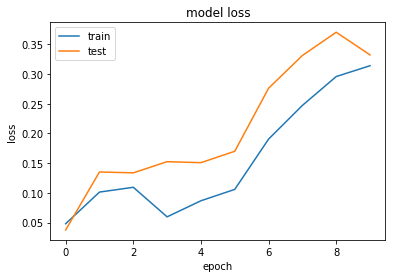

In [40]:
plt.plot(results.history['my_iou_metric'])
plt.plot(results.history['val_my_iou_metric'])
plt.title('model iou_metric')
plt.ylabel('iou')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['my_iou_metric'])
plt.plot(results.history['val_my_iou_metric'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
#reading test set
test_dir = os.listdir("/input/stage1_test")

In [42]:
len(test_dir)

65

In [43]:
test_images = []
size_test = []
for dirs in test_dir:
    test_images.append(plt.imread("../input/stage1_test/"+ dirs + "/" + "images"+"/"+os.listdir("../input/stage1_test/"+ dirs + "/" + "images")[0]))
for i in range(len(test_images)):
    size_test.append([test_images[i].shape[0], test_images[i].shape[1]])
    test_images[i] = resize(test_images[i] , (512,512,3))
    

/usr/local/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [44]:
test_images = np.array(test_images)
print(test_images.shape)

(65, 512, 512, 3)


In [45]:
prediction = model.predict(test_images)

In [46]:
prediction[prediction >= 0.5] = 1
prediction[prediction < 0.5] = 0

In [47]:
plt.imshow(np.squeeze(preds_test_upsampled[4]))

NameError: name 'preds_test_upsampled' is not defined

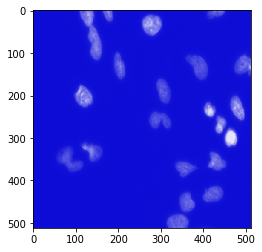

In [48]:
plt.imshow(np.squeeze(test_images[3]))

In [49]:
preds_test_upsampled = []
for i in range(len(prediction)):
    preds_test_upsampled.append(resize(np.squeeze(prediction[i]), 
                                       (size_test[i][0], size_test[i][1]), 
                                       mode='constant', preserve_range=True))

In [50]:
np.unique(prediction[1])

array([ 0.,  1.], dtype=float32)

In [57]:
preds_test_upsampled[1].shape

(256, 256)

In [58]:
preds_test_upsampled[preds_test_upsampled >= 0.5] = 1
preds_test_upsampled[preds_test_upsampled < 0.5] = 0

TypeError: unorderable types: list() >= float()

In [ ]:
plt.imshow(np.squeeze(prediction[1]))

In [ ]:
plt.imshow(np.squeeze(preds_test_upsampled[1]))

In [58]:
for i in range(len(preds_test_upsampled)):
    preds_test_upsampled[i][preds_test_upsampled[i] > 0.5] = 1
    preds_test_upsampled[i][preds_test_upsampled[i] <= 0.5] = 0

In [ ]:
# Run-length encoding stolen from https://www.kaggle.com/rakhlin/fast-run-length-encoding-python
def rle_encoding(x):
    dots = np.where(x.T.flatten() == 1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b + 1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

def prob_to_rles(x, cutoff=0.5):
    lab_img = label(x > cutoff)
    for i in range(1, lab_img.max() + 1):
        yield rle_encoding(lab_img == i)

In [ ]:
list(rle_encoding(preds_test_upsampled[0]))

In [ ]:
new_test_ids = []
rles = []
for n, id_ in enumerate(test_dir):
    rle = list(prob_to_rles(preds_test_upsampled[n]))
    rles.extend(rle)
    new_test_ids.extend([id_] * len(rle))

In [ ]:
len(np.unique(new_test_ids))

In [1]:
sub = pd.DataFrame()
sub['ImageId'] = new_test_ids
sub['EncodedPixels'] = pd.Series(rles).apply(lambda x: ' '.join(str(y) for y in x))
sub.to_csv('submit_final.csv', index=False)

NameError: name 'pd' is not defined

In [2]:
import numpy 

In [5]:
X = np.random.rand(500,)

In [7]:
Y = np.random.rand(500,)

In [9]:
model = Sequential()

In [19]:
model = Sequential()
model.add(Dense(12, input_dim=1, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=1)

Train on 334 samples, validate on 166 samples
Epoch 1/150
334/334 [==============================] - 1s 2ms/step - loss: 0.6931 - acc: 0.0000e+00 - val_loss: 0.6933 - val_acc: 0.0000e+00
Epoch 2/150
334/334 [==============================] - 0s 420us/step - loss: 0.6931 - acc: 0.0000e+00 - val_loss: 0.6933 - val_acc: 0.0000e+00
Epoch 3/150
334/334 [==============================] - 0s 440us/step - loss: 0.6931 - acc: 0.0000e+00 - val_loss: 0.6934 - val_acc: 0.0000e+00
Epoch 4/150
334/334 [==============================] - 0s 322us/step - loss: 0.6931 - acc: 0.0000e+00 - val_loss: 0.6934 - val_acc: 0.0000e+00
Epoch 5/150
334/334 [==============================] - 0s 323us/step - loss: 0.6931 - acc: 0.0000e+00 - val_loss: 0.6935 - val_acc: 0.0000e+00
Epoch 6/150
334/334 [==============================] - 0s 385us/step - loss: 0.6931 - acc: 0.0000e+00 - val_loss: 0.6936 - val_acc: 0.0000e+00
Epoch 7/150
334/334 [==============================] - 0s 407us/step - loss: 0.6930 - acc: 0.0000e

Epoch 114/150
334/334 [==============================] - 0s 346us/step - loss: 0.6919 - acc: 0.0000e+00 - val_loss: 0.6923 - val_acc: 0.0000e+00
Epoch 115/150
334/334 [==============================] - 0s 374us/step - loss: 0.6919 - acc: 0.0000e+00 - val_loss: 0.6925 - val_acc: 0.0000e+00
Epoch 116/150
334/334 [==============================] - 0s 349us/step - loss: 0.6919 - acc: 0.0000e+00 - val_loss: 0.6922 - val_acc: 0.0000e+00
Epoch 117/150
334/334 [==============================] - 0s 366us/step - loss: 0.6920 - acc: 0.0000e+00 - val_loss: 0.6923 - val_acc: 0.0000e+00
Epoch 118/150
334/334 [==============================] - 0s 382us/step - loss: 0.6918 - acc: 0.0000e+00 - val_loss: 0.6922 - val_acc: 0.0000e+00
Epoch 119/150
334/334 [==============================] - 0s 371us/step - loss: 0.6918 - acc: 0.0000e+00 - val_loss: 0.6923 - val_acc: 0.0000e+00
Epoch 120/150
334/334 [==============================] - 0s 380us/step - loss: 0.6918 - acc: 0.0000e+00 - val_loss: 0.6923 - val_a

In [24]:
len(history.history['val_loss'])

150

In [57]:
x = np.arange(15100)
plt.figure(1)
plt.plot(history.history['val_loss'])
plt.xticks(np.arange(min(x), max(x)+1, 10.0))

([<matplotlib.axis.XTick at 0x12fc5e2e8>,
  ...],
 <a list of 1510 Text xticklabel objects>)

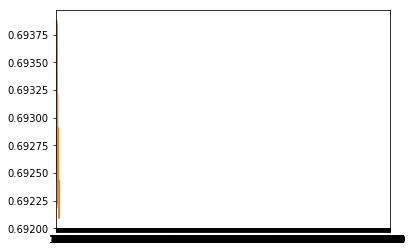

In [58]:
plt.show()